In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Impact_Chat4.csv')
data.head()

,university,influence_on_teaching,group_collaboration_usage,critical_thinking_support,data_privacy_concern,perceived_creativity_reduction,learning_experience_improvement,education_level_Postgraduate,education_level_Undergraduate,academic_chatgpt_use_frequency_Monthly,academic_chatgpt_use_frequency_Never,academic_chatgpt_use_frequency_Weekly
0,75,2,2,2,1,0,2,False,True,False,False,False
1,75,2,1,2,1,2,0,False,True,True,False,False
2,75,2,2,2,0,1,2,False,True,False,False,False
3,75,2,2,2,0,1,2,False,True,False,False,False
4,67,3,2,2,1,2,1,False,True,True,False,False


In [3]:
# Split features and target
X = data.drop('learning_experience_improvement', axis=1)
y = data['learning_experience_improvement']

# Display the encoded dataset
print(X)
print(y)

      university  influence_on_teaching  group_collaboration_usage  \
0             75                      2                          2   
1             75                      2                          1   
2             75                      2                          2   
3             75                      2                          2   
4             67                      3                          2   
...          ...                    ...                        ...   
2679         196                      2                          1   
2680         196                      3                          1   
2681         196                      2                          1   
2682         121                      2                          2   
2683         121                      3                          2   

      critical_thinking_support  data_privacy_concern  \
0                             2                     1   
1                             2              

In [4]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5176908752327747
Weighted Precision: 0.8935451502243207
Micro Precision: 0.5176908752327747
Macro Precision: 0.3913354225081093
Precision per class: [0.21276596 0.         0.96124031]

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.65      0.32        46
           1       0.00      0.00      0.00         2
           2       0.96      0.51      0.66       489

    accuracy                           0.52       537
   macro avg       0.39      0.39      0.33       537
weighted avg       0.89      0.52      0.63       537



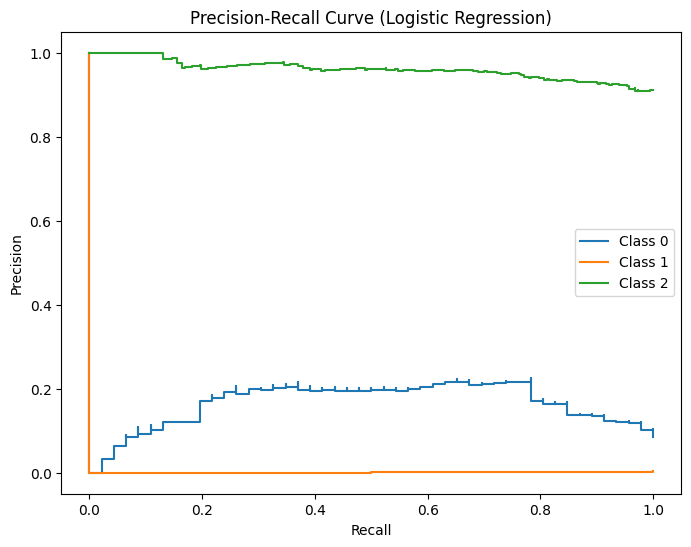

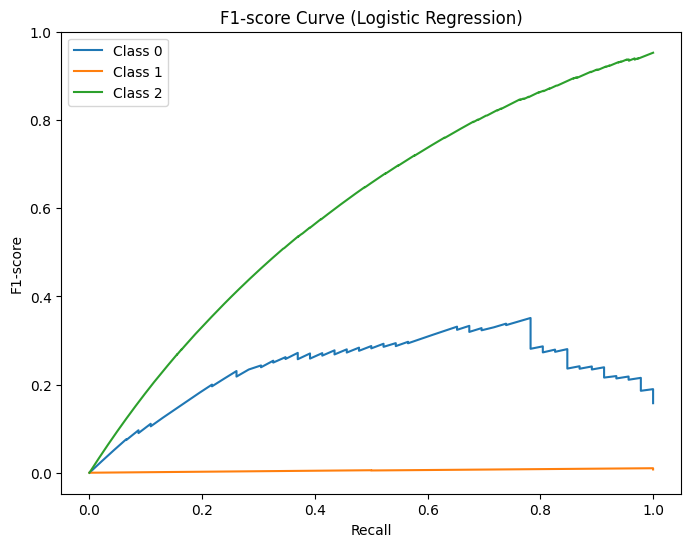

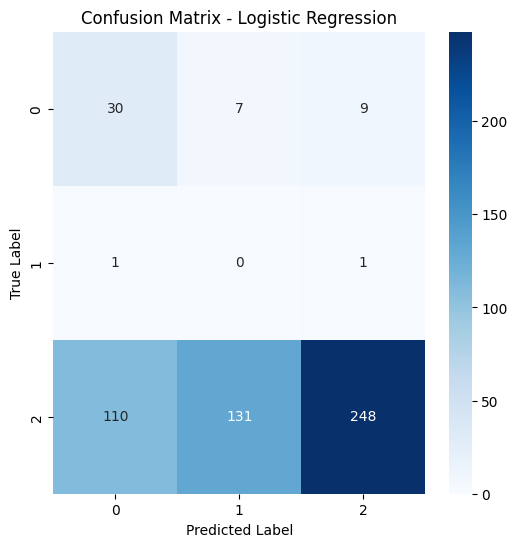

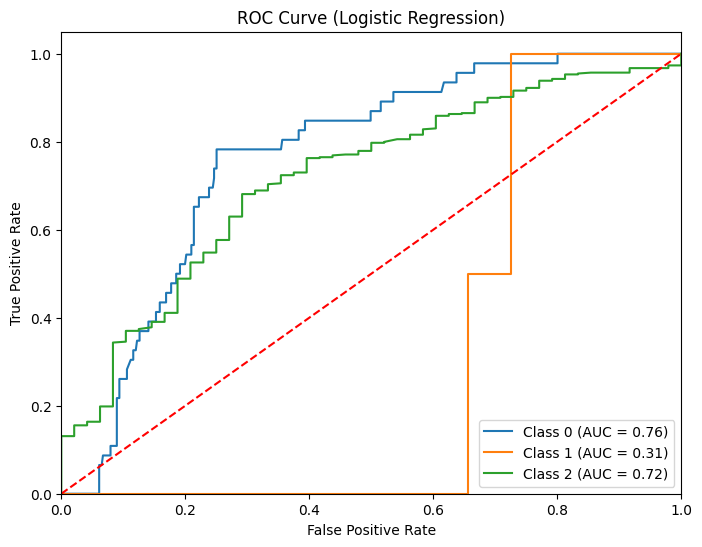

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# (Optional) scale features if not already done
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Initialize and train Logistic Regression
logistic_classifier = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=42)
logistic_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred = logistic_classifier.predict(X_test_scaled)
y_pred_probs = logistic_classifier.predict_proba(X_test_scaled)
classes = np.unique(y_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.legend()
plt.show()

# F1-score Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (Logistic Regression)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# ROC Curve and AUC per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:11:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8845437616387337
Weighted Precision: 0.893316096464903
Micro Precision: 0.8845437616387337
Macro Precision: 0.45173074619714937
Precision per class: [0.41304348 0.         0.94214876]

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.41      0.41        46
           1       0.00      0.00      0.00         2
           2       0.94      0.93      0.94       489

    accuracy                           0.88       537
   macro avg       0.45      0.45      0.45       537
weighted avg       0.89      0.88      0.89       537



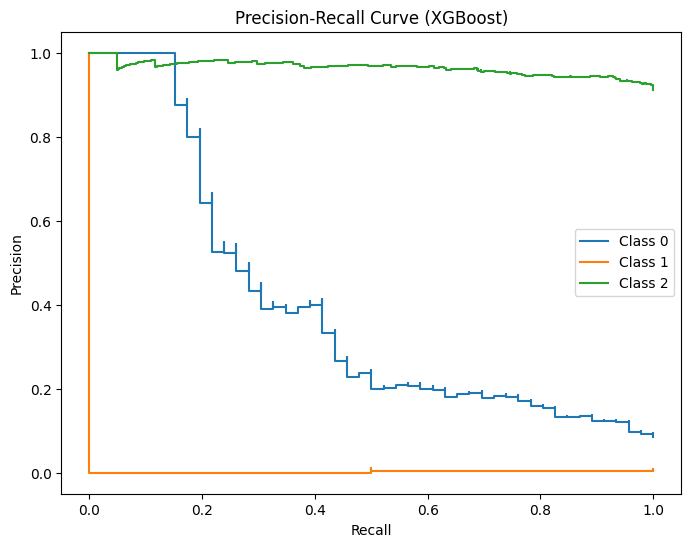

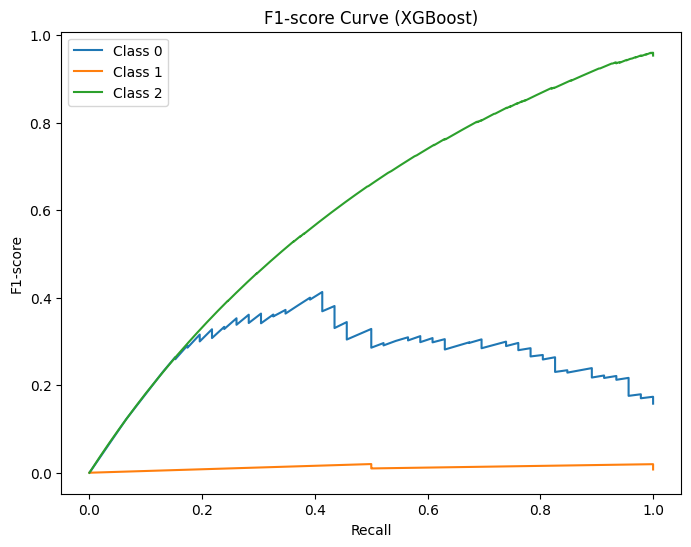

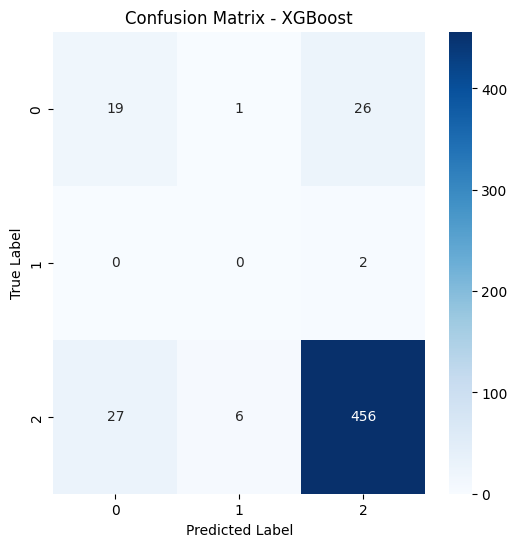

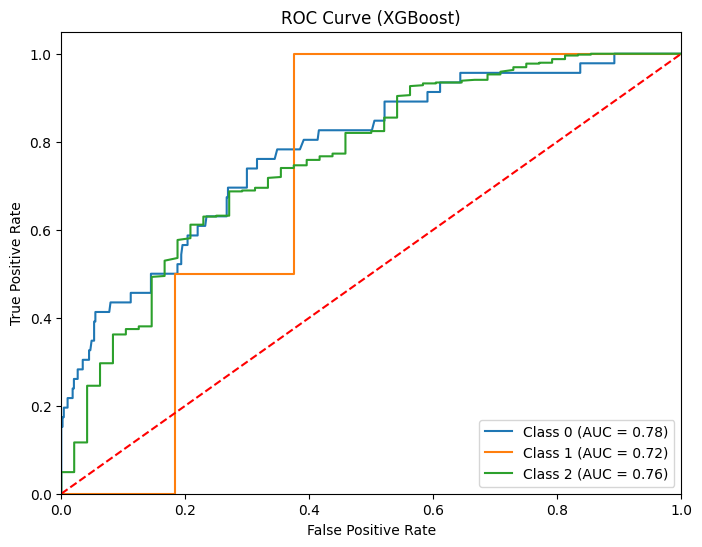

In [8]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# (Optional) scale features if not already done
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Initialize and train XGBClassifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred = xgb_classifier.predict(X_test_scaled)
y_pred_probs = xgb_classifier.predict_proba(X_test_scaled)
classes = np.unique(y_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.legend()
plt.show()

# F1-score Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (XGBoost)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# ROC Curve and AUC per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.8566108007448789
Weighted Precision: 0.8718641801083106
Micro Precision: 0.8566108007448789
Macro Precision: 0.40370215727209463
Precision per class: [0.28       0.         0.93110647]

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.30      0.29        46
           1       0.00      0.00      0.00         2
           2       0.93      0.91      0.92       489

    accuracy                           0.86       537
   macro avg       0.40      0.41      0.40       537
weighted avg       0.87      0.86      0.86       537



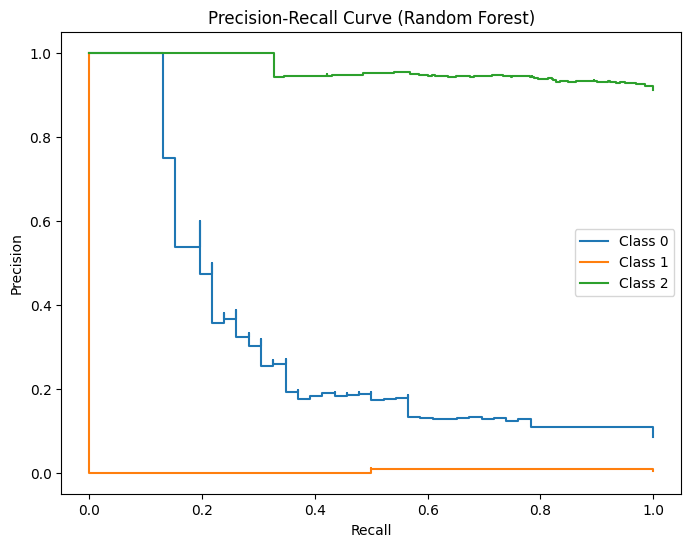

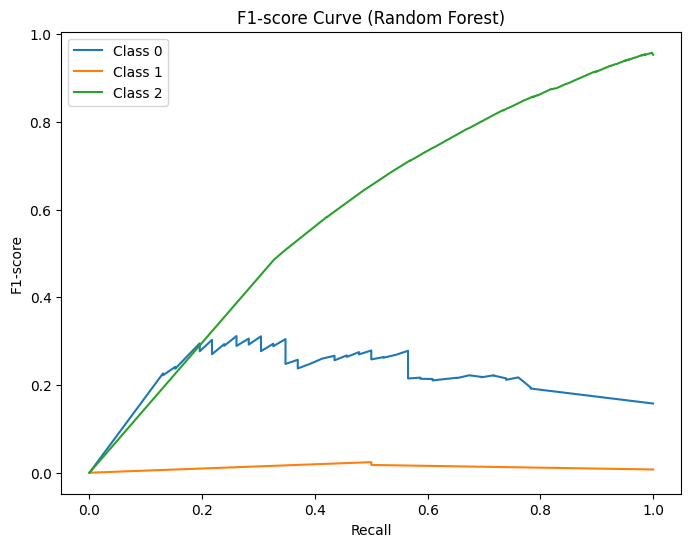

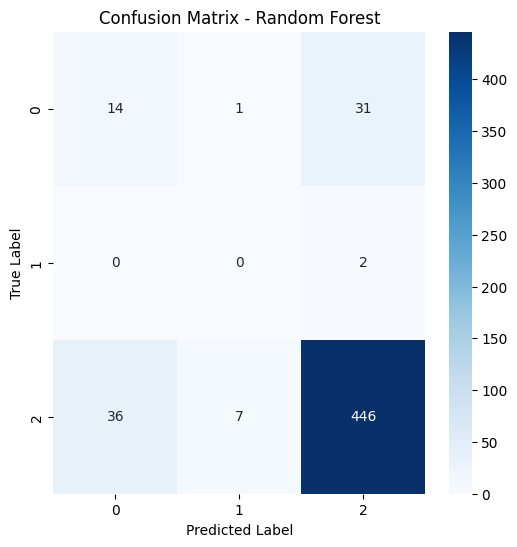

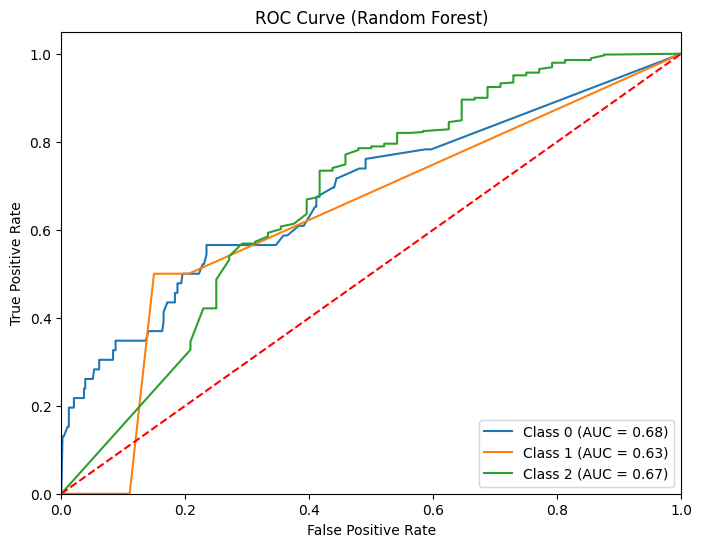

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# (Optional) scale features if not already done (RF doesn't require scaling but you can keep it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred = rf_classifier.predict(X_test_scaled)
y_pred_probs = rf_classifier.predict_proba(X_test_scaled)
classes = np.unique(y_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.legend()
plt.show()

# F1-score Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (Random Forest)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC Curve and AUC per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1849
[LightGBM] [Info] Number of data points in the train set: 4692, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.88268156424581
Weighted Precision: 0.89120857832486
Micro Precision: 0.88268156424581
Macro Precision: 0.4497656982193065
Precision per class: [0.40909091 0.         0.94020619]

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.39      0.40        46
           1       0.00      0.00      0.00         2
           2       0.94      0.93      0.94       489

    accuracy                           0.88       537
   macro avg       0.45      0.44      0.45       537
weighted avg       0.89      0.88      0.89       537



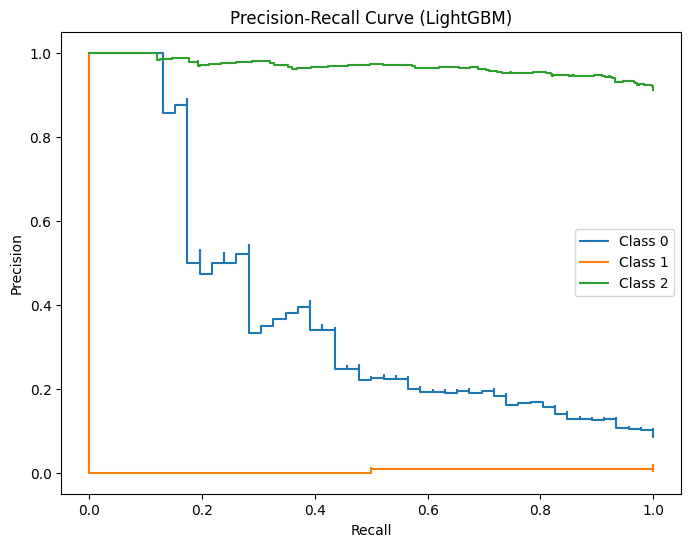

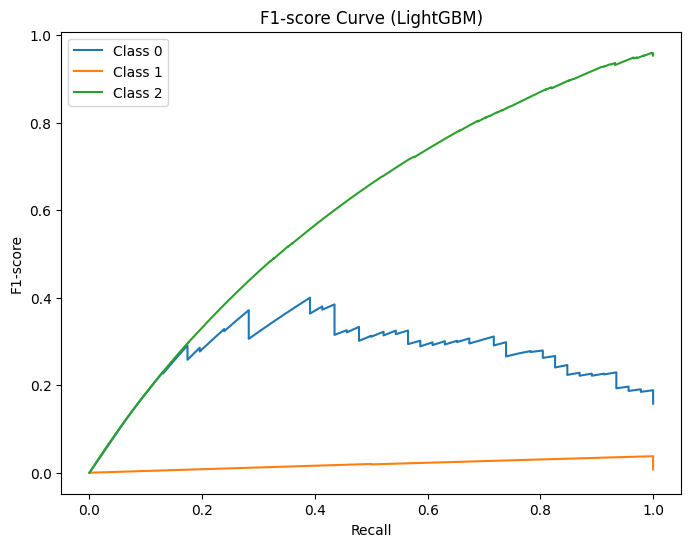

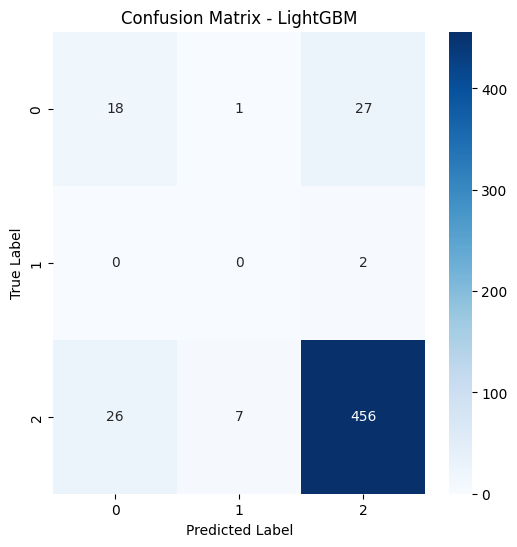

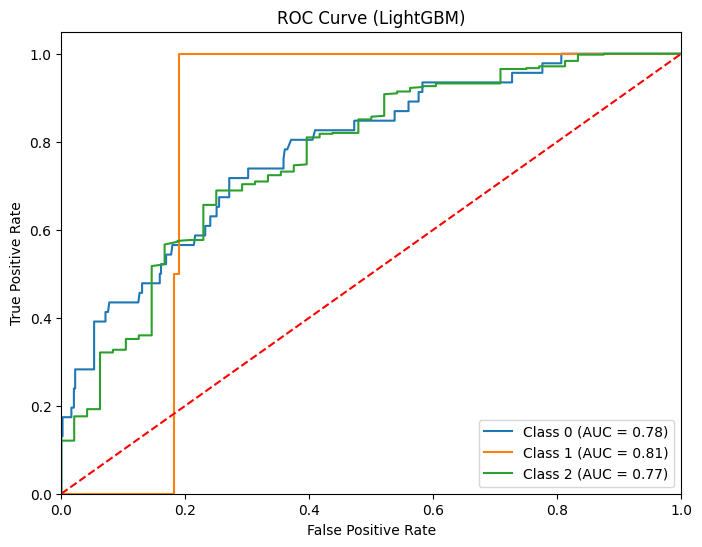

In [11]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# (Optional) scale numeric features - LightGBM can handle unscaled data, but scaling won't hurt
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Initialize LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred = lgb_classifier.predict(X_test_scaled)
y_pred_probs = lgb_classifier.predict_proba(X_test_scaled)
classes = np.unique(y_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (LightGBM)')
plt.legend()
plt.show()

# F1-score Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (LightGBM)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LightGBM')
plt.show()

# ROC Curve and AUC per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LightGBM)')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.6797020484171322
Weighted Precision: 0.8949608385378675
Micro Precision: 0.6797020484171322
Macro Precision: 0.4019360082760659
Precision per class: [0.24615385 0.         0.95965418]

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.70      0.36        46
           1       0.00      0.00      0.00         2
           2       0.96      0.68      0.80       489

    accuracy                           0.68       537
   macro avg       0.40      0.46      0.39       537
weighted avg       0.89      0.68      0.76       537



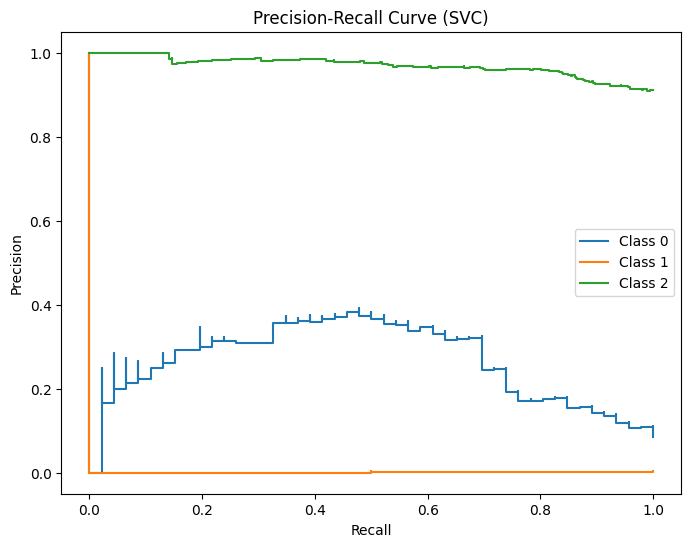

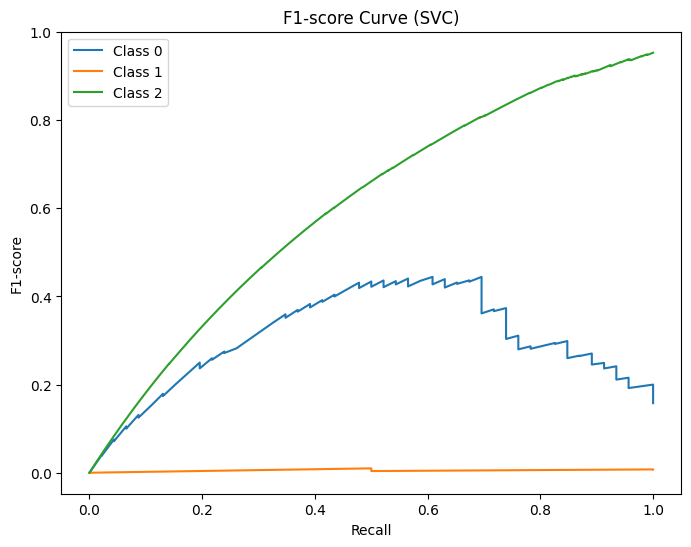

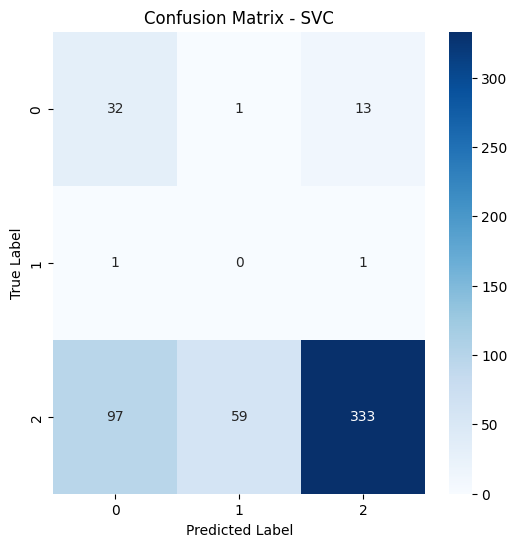

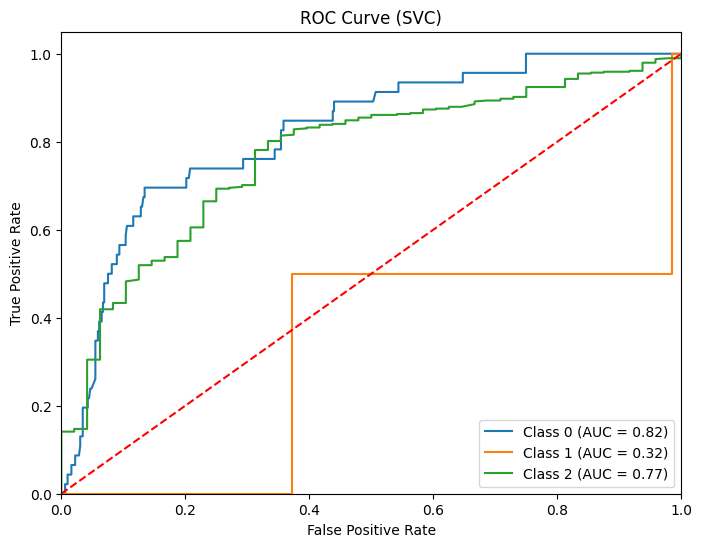

In [12]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Scale features - SVM is sensitive to feature scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE on training set only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Initialize SVC with probability=True to enable predict_proba
svc_classifier = SVC(probability=True, random_state=42)

# Train the SVC
svc_classifier.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred = svc_classifier.predict(X_test_scaled)
y_pred_probs = svc_classifier.predict_proba(X_test_scaled)
classes = np.unique(y_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVC)')
plt.legend()
plt.show()

# F1-score Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (SVC)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVC')
plt.show()

# ROC Curve and AUC per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVC)')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.7635009310986964
Weighted Precision: 0.8655635616336335
Micro Precision: 0.7635009310986964
Macro Precision: 0.37254674792038367
Precision per class: [0.18446602 0.         0.93317422]

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.41      0.26        46
           1       0.00      0.00      0.00         2
           2       0.93      0.80      0.86       489

    accuracy                           0.76       537
   macro avg       0.37      0.40      0.37       537
weighted avg       0.87      0.76      0.81       537



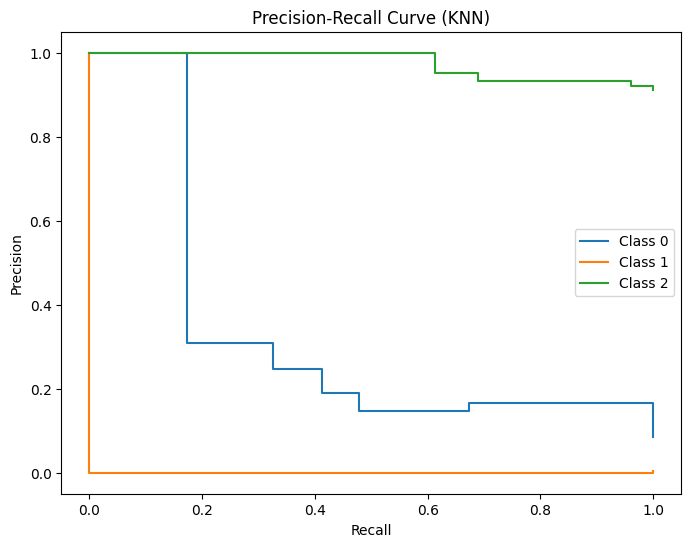

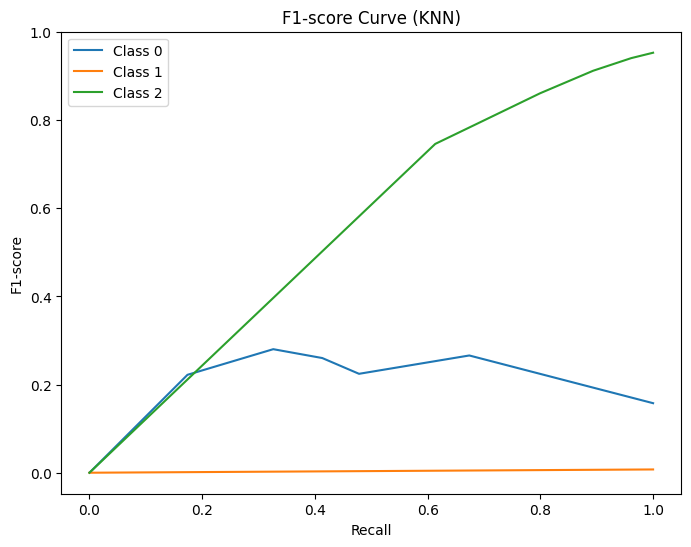

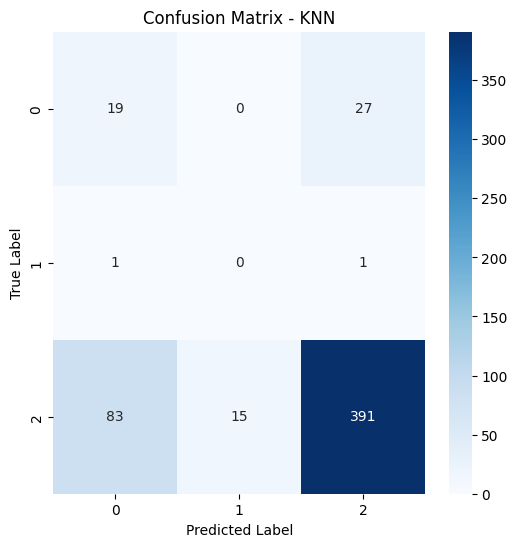

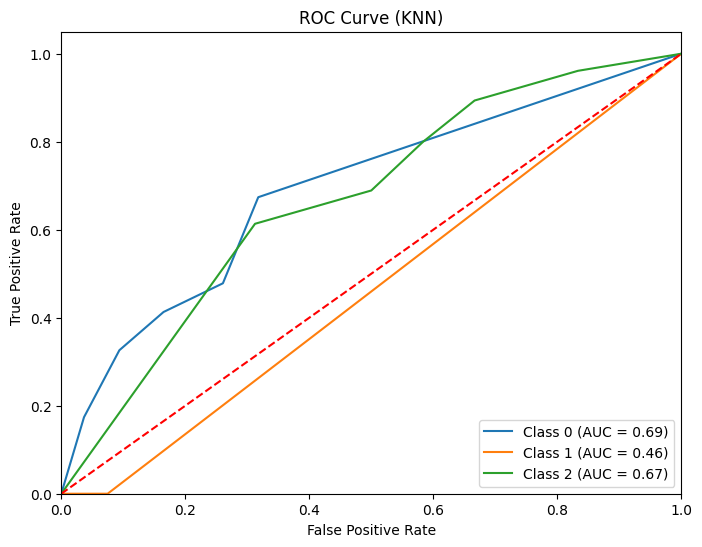

In [13]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Scale features - KNN is sensitive to scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train KNN
knn_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred = knn_classifier.predict(X_test_scaled)
y_pred_probs = knn_classifier.predict_proba(X_test_scaled)
classes = np.unique(y_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (KNN)')
plt.legend()
plt.show()

# F1-score Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (KNN)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')
plt.show()

# ROC Curve and AUC per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')
plt.legend(loc="lower right")
plt.show()
